<a href="https://colab.research.google.com/github/khandelwal1998/-SmileRecognition/blob/master/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab import files

In [0]:
files.upload()

Saving bank.csv to bank.csv
Saving bank-full.csv to bank-full.csv


In [1]:
!dir

bank.csv  bank-full.csv  sample_data


In [0]:
df=pd.read_csv('bank-full.csv',sep=';')

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
df.shape

(45211, 17)

In [23]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [24]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Theres a imbalance in the data

In [26]:
for col in df.drop('y',axis=1).columns:
  if(df[col].dtypes=='O'):
    print(col)
    print(df[col].value_counts())
    print("\n")

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


default
no     44396
yes      815
Name: default, dtype: int64


housing
yes    25130
no     20081
Name: housing, dtype: int64


loan
no     37967
yes     7244
Name: loan, dtype: int64


contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


poutcome
unknown    36959

Lets first deal with the categorical values.

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le=LabelEncoder()

In [0]:
def categorical(df):
  job_new=[]
  for i in df['job']:
    if(i=='unknown' or i =='student' or i=='unemployed'):
      job_new.append(0)
    else:
      job_new.append(1)
  pout=[]
  for i in df['poutcome']:
    if(i=='unknown' or i=='failure'):
      pout.append(0)
    else:
      pout.append(1)
  df['poutcome']=pout
  df['job']=job_new
  df['marital']=le.fit_transform(df['marital'])
  df['default']=le.fit_transform(df['default'])
  df['education']=le.fit_transform(df['education'])
  df['housing']=le.fit_transform(df['housing'])
  df['loan']=le.fit_transform(df['loan'])
  df['contact']=le.fit_transform(df['contact'])
  df['y']=le.fit_transform(df['y'])
  df.drop('month',axis=1,inplace=True)
  return(df)
    
  
  

In [0]:
df=categorical(df)

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,58,1,1,2,0,2143,1,0,2,5,261,1,-1,0,0,0
1,44,1,2,1,0,29,1,0,2,5,151,1,-1,0,0,0
2,33,1,1,1,0,2,1,1,2,5,76,1,-1,0,0,0
3,47,1,1,3,0,1506,1,0,2,5,92,1,-1,0,0,0
4,33,0,2,3,0,1,0,0,2,5,198,1,-1,0,0,0


In [32]:
df.shape

(45211, 16)

Now lets check the presence of outliers in discrete values

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


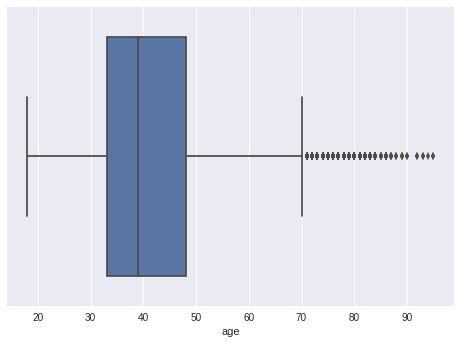

In [34]:
sns.boxplot(df['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


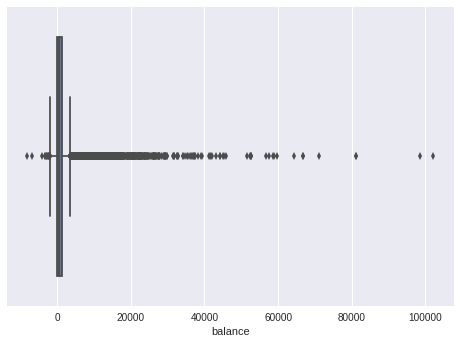

In [35]:
sns.boxplot(df['balance'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


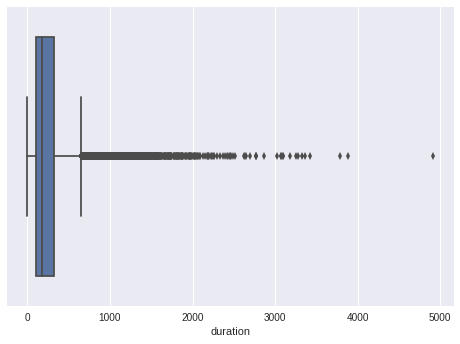

In [36]:
sns.boxplot(df['duration'])

Lets normalize the data to remove the outliers

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()

In [39]:
df['age']=scaler.fit_transform(df['age'].reshape(-1,1))
df['duration']=scaler.fit_transform(df['duration'].reshape(-1,1))
df['balance']=scaler.fit_transform(df['balance'].reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScal

In [40]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,1.606965,1,1,2,0,0.256419,1,0,2,5,0.011016,1,-1,0,0,0
1,0.288529,1,2,1,0,-0.437895,1,0,2,5,-0.416127,1,-1,0,0,0
2,-0.747384,1,1,1,0,-0.446762,1,1,2,5,-0.707361,1,-1,0,0,0
3,0.571051,1,1,3,0,0.047205,1,0,2,5,-0.645231,1,-1,0,0,0
4,-0.747384,0,2,3,0,-0.447091,0,0,2,5,-0.233620,1,-1,0,0,0


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [0]:
x=df.drop('y',axis=1)
y=df['y']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [0]:
model1=LogisticRegression()

In [45]:
model1.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
result=model1.predict(x_test)

In [47]:
result.shape

(9043,)

In [48]:
confusion_matrix(y_test,result)

array([[7788,  188],
       [ 772,  295]])

In [49]:
accuracy_score(y_test,result)

0.8938405396439235

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param={'C':[1,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [0]:
log_grid=GridSearchCV(model1,param)

In [53]:
log_grid.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
log_grid.best_params_

{'C': 1}

In [0]:
log_result=accuracy_score(y_test,log_grid.predict(x_test))

In [58]:
log_result

0.8938405396439235

Lets try other classification models like Decision tree, RF 

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [0]:
li=np.linspace(1,50,50)

In [0]:
params={'max_depth':li}

In [0]:
grid=GridSearchCV(DecisionTreeClassifier(),params)

In [63]:
grid.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
grid.best_params_

{'max_depth': 5.0}

In [0]:
result=grid.predict(x_test)

In [0]:
decisionTree_score=accuracy_score(y_test,result)

In [69]:
decisionTree_score

0.8961627778392126

Random Forest

In [0]:
param={'n_estimators':[10,30,50,60,80,150,200]}

In [0]:
model=GridSearchCV(RandomForestClassifier(),param)

In [89]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 30, 50, 60, 80, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
model.best_params_

{'n_estimators': 200}

In [0]:
Random_score=accuracy_score(y_test,model.predict(x_test))

In [92]:
Random_score

0.901249585314608

In [94]:
Algo=['LogisticRegression','DecisionTree','RandomForest']
score = [log_result,decisionTree_score,Random_score]
compare=pd.DataFrame({'Model':Algo,'Accuracy_score':score},index=[i for i in range(1,4)])
compare.T

,1,2,3
Accuracy_score,0.893841,0.896163,0.90125
Model,LogisticRegression,DecisionTree,RandomForest


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


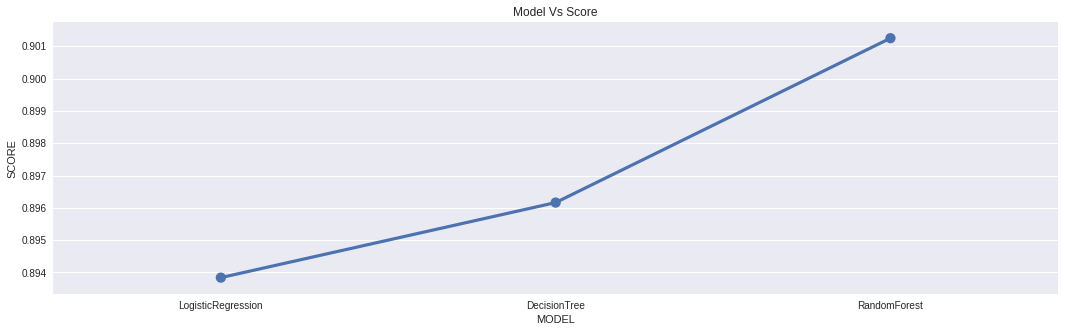

In [96]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='Accuracy_score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()